In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
le = LabelEncoder()

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,45.0,1,2,W./C. 6607,23.4500,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


# Dealing with NULL values

<h3>Since Cabin variable has more than 50% null values, we will drop it</h3>

<h3>Along with that Name, Ticket and PassengerId seem to have no use, hence we will drop them</h3>

In [4]:
df.drop(columns = ["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Checking for duplicates

In [5]:
df.duplicated().sum()

113

# Encoding Values

In [6]:
for column in ["Sex", "Embarked"]:
    df[column] = le.fit_transform(df[column])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.7 KB


<h3>Category variables are encoded</h3>

In [8]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,32.699854,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,14.346821,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,45.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Checking for outliers

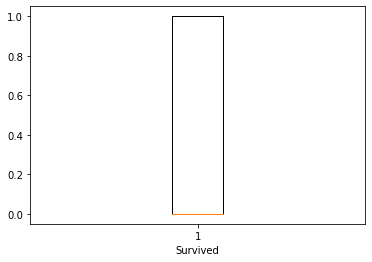

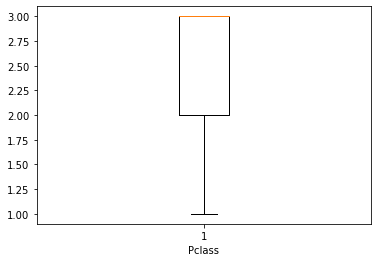

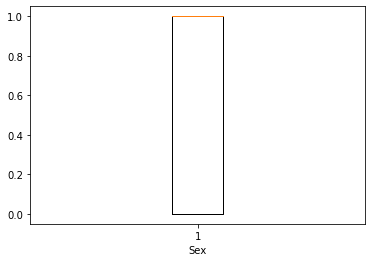

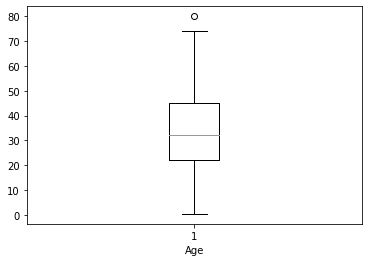

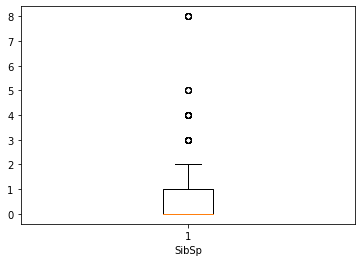

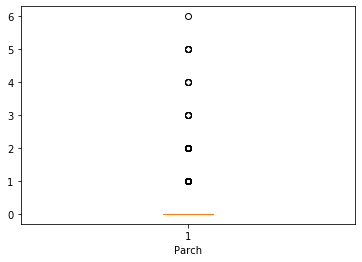

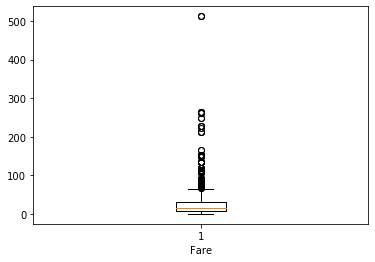

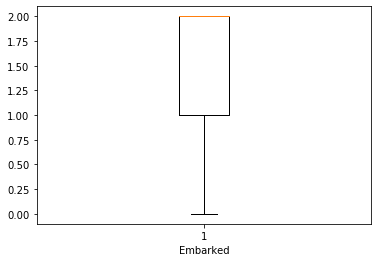

In [9]:
for column in df.columns:
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.show()

# Splitting target from dataset

In [11]:
X = df[['Sex', "SibSp", "Parch", 'Fare', 'Age', 'Embarked', 'Survived']]
y = df["Pclass"]

# Splitting the dataset into training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# KNN

<h3>Making a function to find the score of model with respect to k value</h3>

In [13]:
def knn_score(n):
    model = KNeighborsClassifier(n_neighbors=n)
    return model.fit(X_train, y_train).score(X_test, y_test)*100

The k value that has the greatest score is: 1


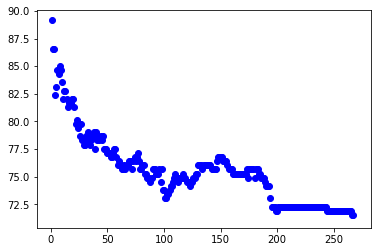

In [14]:
m = 1
for k in range(1,len(X_test)+1):
    plt.scatter(k, knn_score(k), color = "blue")
    if knn_score(k) > knn_score(m):
        m = k
print("The k value that has the greatest score is:", m)

In [15]:
knn = KNeighborsClassifier(n_neighbors=m)

In [16]:
print("Accuracy of the most efficient knn model:", knn.fit(X_train, y_train).score(X_test, y_test)*100,"%")

Accuracy of the most efficient knn model: 89.13857677902621 %


In [17]:
y_pred = knn.predict(X_test)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix:
[[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]


In [18]:
for prediction, actual in zip(y_pred, y_test):
    print("Prediction:", prediction, ", Actual:", actual)

Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 2 , Actual: 3
Prediction: 1 , Actual: 1
Prediction: 2 , Actual: 2
Prediction: 2 , Actual: 1
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 2
Prediction: 3 , Actual: 3
Prediction: 1 , Actual: 1
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 2
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 2 , Actual: 2
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 2 , Actual: 2
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 1
Prediction: 2 , Actual: 2
Prediction: 1 , Actual: 1
Prediction: 1 , Actual: 2
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 3 , Actual: 3
Prediction: 

# SVM

In [44]:
svm = SVC(gamma=0.01, C=100)

In [50]:
for target in df.columns[:]:
    if target != "Fare" and target != "Age":
        print(target)
        y = df[[target]]
        X = df[list(set(df.columns) - set(y.columns))]
        y = df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        svm.fit(X_train, y_train)

        print("Target: "+target+",  Accuracy:", round(svm.score(X_test, y_test)*100, 3))
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, svm.predict(X_test))}\n\n")

Survived
Target: Survived,  Accuracy: 74.719
Confusion Matrix:
[[89 25]
 [20 44]]


Pclass
Target: Pclass,  Accuracy: 92.697
Confusion Matrix:
[[38  2  2]
 [ 0 30  0]
 [ 2  7 97]]


Sex
Target: Sex,  Accuracy: 72.472
Confusion Matrix:
[[30 27]
 [22 99]]


SibSp
Target: SibSp,  Accuracy: 77.528
Confusion Matrix:
[[107  11   1   0   0   0]
 [ 20  21   4   0   0   0]
 [  1   2   1   0   0   0]
 [  1   0   0   1   0   0]
 [  0   0   0   0   6   0]
 [  0   0   0   0   0   2]]


Parch
Target: Parch,  Accuracy: 78.652
Confusion Matrix:
[[121  10   4   0   0   0]
 [ 11  11   2   1   0   1]
 [  4   4   8   0   0   0]
 [  0   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  0   0   0   0   0   0]]


Embarked
Target: Embarked,  Accuracy: 78.652
Confusion Matrix:
[[ 10   0  21]
 [  0   9   7]
 [  6   4 121]]


